# Data Visualization with Seaborn - Exercises

**Author:** Suchanya Namwong

**Course:** Data Science for everyone

---


**In this exercise, we will use the titanic dataset, which is a popular and well-known dataset. It is available in the seaborn library**

In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sns.set_style('darkgrid')

### Loading Data

In [4]:
titanic = sns.load_dataset('titanic')

### The data at a glance

In [5]:
titanic.shape

(891, 15)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### Handle missing data

In [9]:
 np.sum(titanic.isna())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
missing_values_titanic = np.sum(titanic.isna().values)
all_values = (np.prod(titanic.shape)) 
percent_missing = ((missing_values_titanic / all_values) \
							* 100).round(2)

print(f"The dataset has a {percent_missing}% missing value rate.")

The dataset has a 6.5% missing value rate.


#### Dropping missing values in the `age` column

In [11]:
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


When analyzing the distribution of passenger ages on the Titanic, it is important to drop missing values in the "age" column. This is because missing values in the dataset can skew the results and make it difficult to accurately assess the distribution of ages.

In [12]:
titanic.dropna(subset=['age'], inplace=True)
np.sum(titanic.isna())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
titanic.shape

(714, 15)

### What is the distribution of passenger ages on the Titanic?
Knowing the distribution of passenger ages can give insight into the demographic of the passengers and could help identify patterns or trends in the ages of the passengers.

<AxesSubplot:xlabel='age', ylabel='Count'>

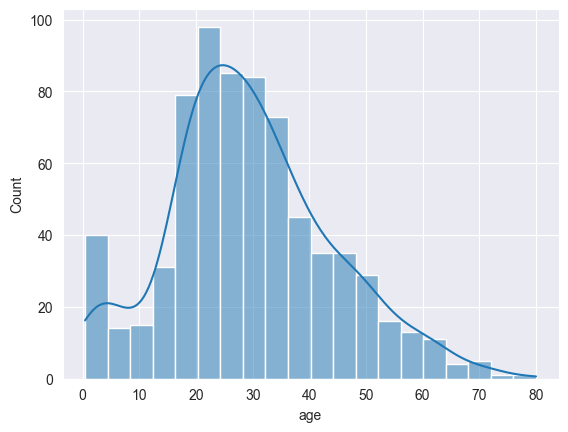

In [14]:
sns.histplot(titanic['age'], kde=True)

### How does the age of passengers relate to their chances of survival?
By understanding the relationship between the age of passengers and their chances of survival, we can identify if there were any age-related factors that may have affected the survival rate and if there were any age-based discrimination.

In [26]:
total_survived = titanic.shape[0]
survived_count = np.sum(titanic["survived"] == 1)
not_survived_count = np.sum(titanic["survived"] == 0)

survived_percentage = round((survived_count / total_survived) *100, 2 )
not_survived_percentage = round((not_survived_count / total_survived) *100, 2 )

print(f"The total number of people is {total_survived}")
print(f"The total number of people who survived is {survived_count}")
print(f"----- The percentage of passengers who survived is {survived_percentage}%")
print(f"The total number of people who not survived is {not_survived_count}")
print(f"----- The percentage of passengers who not survived is {not_survived_percentage}%")


The total number of people is 714
The total number of people who survived is 290
----- The percentage of passengers who survived is 40.62%
The total number of people who not survived is 424
----- The percentage of passengers who not survived is 59.38%


Text(0.5, 1.0, 'Distribution of Age by Survival Outcome')

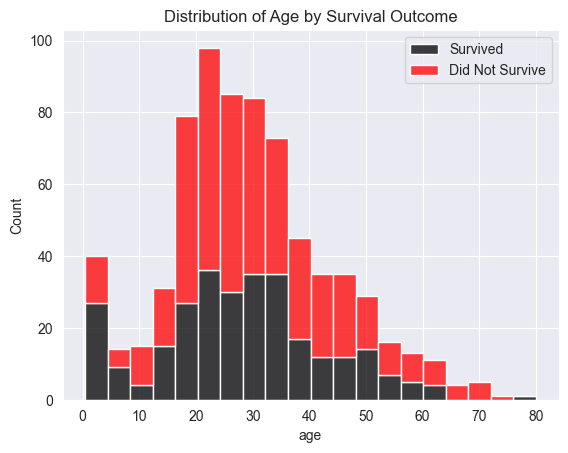

In [52]:
ax = sns.histplot(titanic, x='age', hue='survived', multiple='stack', palette={0: 'red', 1: 'black'})

ax.legend(labels=['Survived', 'Did Not Survive'])

plt.title('Distribution of Age by Survival Outcome')

### What was the fare distribution of the passengers on the Titanic?
Analyzing the fare distribution can provide a sense of the socio-economic status of the passengers and how it may have affected their chances of survival. By plotting the fare distribution, we can see if certain fare groups were over-represented or under-represented on the ship. If certain fare groups were over-represented, it could indicate that they were more vulnerable to the disaster and less likely to survive. If certain fare groups were under-represented, it could indicate that they were less vulnerable to the disaster and more likely to survive. Additionally, by analyzing the fare distribution, we can also see if there were any socio-economic patterns in the evacuation and rescue efforts.

#### remove outliers

In [62]:
q1 = titanic['fare'].quantile(0.25)
q3 = titanic['fare'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
titanic_filtered = titanic[titanic['fare'] <= upper_bound]

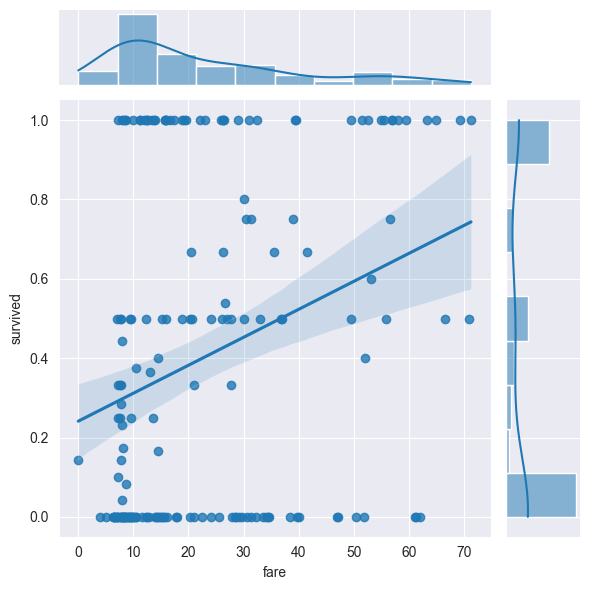

In [86]:
fare_data = titanic_filtered.groupby('fare')['survived'].mean().reset_index()

sns.jointplot(data=fare_data, x='fare', y='survived', kind="reg")

### What is the survival rate for passengers in different classes?
Analyzing the relationship between passenger class and survival rate, we can identify if there were any class-related factors that may have affected the survival rate and if there were any class-based discrimination.

### How does the fare paid by passengers relate to their survival rate?
The relationship between the fare paid by passengers, we can identify if there were any financial-related factors that may have affected the survival rate and if there were any financial-based discrimination.

### Is there a difference in survival rate between male and female passengers?
If there is a difference in survival rate between male and female passengers, we can identify if there were any gender-related factors that may have affected the survival rate and if there were any gender-based discrimination.

### How does the number of siblings or spouses on board affect survival rate?
By understanding the relationship between the number of siblings or spouses on board and the survival rate, we can identify if there were any family-related factors that may have affected the survival rate.

### How does the number of parents or children on board affect survival rate?
By understanding the relationship between the number of parents or children on board and the survival rate, we can identify if there were any family-related factors that may have affected the survival rate.

### What was the survival rate for passengers traveling alone versus those traveling with family?
Analyzing the survival rate for those traveling alone versus those traveling with family can provide insight into the dynamics of families and how they may have affected evacuation priorities and survival chances.

# Exercises

**ให้นำ data ของ titanic ที่เป็น dataframe ไปใช้ทำการ plot ให้ตรงกับภาพดังต่อไปนี้**

**Note! เพื่อไม่ให้ภาพที่ถูกต้องหาย อย่าลืม insert cell ขึ้นมาข้างบนใหม่มาขั้นก่อนทำการ run code จะได้ไม่ทำให้เกิดกันทับซ้อน (overwrite)* *


**จงทำการ plot ให้เหมือนกับรูปตัวอย่างด้านล่างนี้**

**จงทำการ plot ให้เหมือนกับรูปตัวอย่างด้านล่างนี้**

**จงทำการ plot ให้เหมือนกับรูปตัวอย่างด้านล่างนี้**

**จงทำการ plot ให้เหมือนกับรูปตัวอย่างด้านล่างนี้**

**จงทำการ plot ให้เหมือนกับรูปตัวอย่างด้านล่างนี้**

**จงทำการ plot ให้เหมือนกับรูปตัวอย่างด้านล่างนี้**

**จงทำการ plot ให้เหมือนกับรูปตัวอย่างด้านล่างนี้**